In [7]:
import pandas as pd
import matplotlib.dates as mdates
pd.__version__
import scipy

In [122]:
# graph 1: show the trend of different locations over a single day
import matplotlib.pyplot as plt

# Read data from CSV file into a DataFrame
#df = pd.read_csv('KSBD.csv', usecols=['Date_Time', 'air_temp_set_1'], parse_dates=['Date_Time'])
df2 = pd.read_csv('holtables7_3-7.csv', usecols=['Date-Time (PDT)', 'Ch: 1 - Temperature   (°C)'], parse_dates=['Date-Time (PDT)'])
#df3 = pd.read_csv('tablesnearHOL.csv', usecols=['Date-Time (PDT)', 'Ch: 1 - Temperature   (°C)'], parse_dates=['Date-Time (PDT)'])
#df4 = pd.read_csv('bekinslot.csv', usecols=['Date-Time (PDT)', 'Ch: 1 - Temperature   (°C)'], parse_dates=['Date-Time (PDT)'])
# Set the date column as the index
#df.set_index('Date_Time', inplace=True)
df2.set_index('Date-Time (PDT)', inplace=True)
#df3.set_index('Date-Time (PDT)', inplace=True)
#df4.set_index('Date-Time (PDT)', inplace=True)

# Plot the data
#df['air_temp_set_1'].plot(label = "Readings")
df2['Ch: 1 - Temperature   (°C)'].plot(label = "HOL Tables")
#df3['Ch: 1 - Temperature   (°C)'].plot(label = "Hall of Letters Tables")
#df4['Ch: 1 - Temperature   (°C)'].plot(label = "Bekins Parking Lot")
# Show the plot
plt.legend()
plt.ylabel("Temperature (*C)")
plt.show()

ValueError: Usecols do not match columns, columns expected but not found: ['Ch: 1 - Temperature   (°C)']

19541.447141203702 19545.537418981483
19541.42829861111 19545.549826388888
19541.42829861111 19545.549826388888
19541.42829861111 19545.549826388888
19541.42829861111 19545.549826388888
19541.42829861111 19545.555011574073


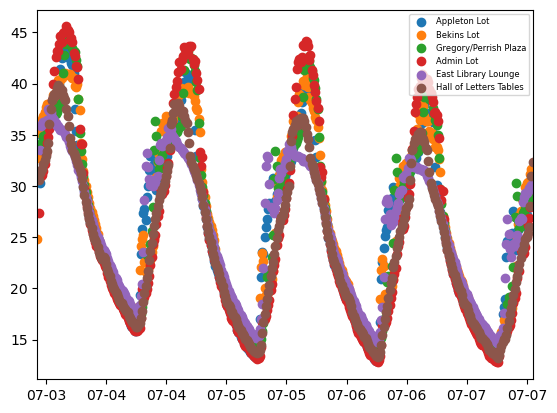

In [228]:
# graph 2: show the differences in temperature readings at different hours in a day
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# list of CSV files
bekinslot_files = ['bekins7_3-7.csv']#['bekinslot6_1.csv','bekinslot6_5.csv', 'bekinslot6_6.csv', 'bekinslot6_7.csv', 'bekins6_9.csv', 'bekins6_12.csv', 'bekins6_13.csv', 'bekins6_14.csv', 'bekins6_15.csv']
eastlibtables_files = ['eastlibtables7_3-7.csv']#['eastlibtables6_7.csv', 'eastlibtables6_8.csv', 'eastlibtables6_9.csv', 'eastlibtables6_12.csv', 'eastlibtables6_13.csv', 'eastlibtables6_14.csv', 'eastlibtables6_15.csv']
HOLtables_files = ['holtables7_3-7.csv']#['holtables6_1.csv', 'holtables6_8.csv', 'HOLtables6_9.csv', 'holtables6_12.csv', 'holtables6_13.csv', 'holtables6_14.csv', 'holtables6_15.csv']
adminlot_files = ['admin7_3-7.csv']#['admin6_5.csv','admin6_6.csv', 'admin6_8.csv', 'admin6_9.csv', 'admin6_12.csv', 'admin6_13.csv', 'admin6_14.csv', 'admin6_20-22.csv'] 
appleton_files = ['appleton7_3-7.csv']#['Appleton6_2.csv', 'Appleton6_5.csv', 'Appleton6_6.csv', 'appleton6_9.csv', 'Appletonlot6_12.csv', 'Appleton6_13.csv', 'Appleton6_14.csv', 'appletonlot6_15.csv']
gregory_files = ['gregory7_3-7.csv']#['gregoryplaza6_2.csv', 'gregoryplaza6_8.csv', 'gregory6_9.csv', 'gregory6_12.csv', 'gregory6_13.csv', 'gregory6_14.csv']
alldata = [
           appleton_files,
           bekinslot_files,
           gregory_files, #type [-1] right after list name to only use the last file in the list
           adminlot_files,
           eastlibtables_files,
           HOLtables_files,
           ]
labels = [
    "Appleton Lot", 
          "Bekins Lot", 
          "Gregory/Perrish Plaza", 
          "Admin Lot", 
          "East Library Lounge", 
          "Hall of Letters Tables"]

# create figure and axis
fig, ax = plt.subplots()

# empty list
#y_interp_list = []
y_list = []
x_list = []
df = pd.DataFrame()
# loop through CSV files
N_obs = 0
x_interp = None
for csv_files in alldata:
    # read data from CSV file into DataFrame, parsing dates and times
    df = pd.DataFrame() # resets data to an empty frame as a placeholder
    for csv_file in csv_files: # read each dataframe within each list and concatenate
                   dfr = pd.read_csv(csv_file, parse_dates=['Date-Time (PDT)'])
                   df  = pd.concat([df, dfr], axis = 0)      
    #df = pd.concat([df, df1], axis = 0) # concatenates the cumulative data
    # extract x and y values from DataFrame
    x = df['Date-Time (PDT)'].values
    y = df['Ch:1 - Temperature   (°C)'].values
    hasdata = (~np.isnan(x))*(~np.isnan(y))
    x = x[hasdata]
    y = y[hasdata]
    
    # convert dates to numerical values (timestamps)
    x = mdates.date2num(x)
    if x_interp is None:
        x_interp = x

    # perform linear interpolation
    #y_interp = interp1d(x, y,fill_value=np.NaN)

    #append x and y values to list
    x_list.append(x)
#    print(x.shape,x_list[-1].shape)
#    yi = y_interp(x_interp)
    y_list.append(y.tolist())
    #data_frames.append(df)
#
# calculate mean of interpolated y values for each x value
#y_mean = np.mean(y_interp_list, axis=0)
xmin = np.inf
xmax = -np.inf
for x in x_list:
    xmin = np.min([xmin,np.nanmin(x)])
    xmax = np.max([xmax,np.nanmax(x)])
    print(xmin,xmax)
x_interp =  np.arange(xmin,xmax+.01,.01)

#print(x_interp)
# plot mean of interpolated y values
#ax.plot(x_list, (y_interp_list-y_mean), label='Mean')
yi_list = []
Nobs = 0*x_interp
ymean = 0*x_interp
for i,x in enumerate(x_list):
    label = labels[i]
    delta = np.min(np.abs(x[:,np.newaxis]-x_interp),axis=0)
    mask = delta*0+1
    mask[delta>.1]=np.nan
  #  print(np.array(x_list[i])-x)
    #ax.plot(x_list[i], y_list[i], ".", label=label)
    y_interp = interp1d(x, y_list[i],fill_value=np.NaN,bounds_error=False)
    yi = y_interp(x_interp)*mask
    #ax.plot(x_interp-np.floor(x_interp), yi, ".", label=label+" interp")
    ymean[~np.isnan(yi)] = yi[~np.isnan(yi)]+ymean[~np.isnan(yi)]
    yi_list.append(yi*mask)
    Nobs[~np.isnan(yi)] = Nobs[~np.isnan(yi)]+1
ymean[Nobs>0] = ymean[Nobs>0]/Nobs[Nobs>0]
ymean[Nobs==0] = np.nan 
for i, yi in enumerate(yi_list):
    label = labels[i]
    #ax.scatter(x_interp, yi-ymean, label=label)
    ax.scatter(x_interp, yi, label=label)
#ax.scatter(x_interp, ymean, label="mean")
ax.set_xlim(xmin,xmax)
# format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
#print(yi_list)
# add legend and show plot

ax.legend(fontsize = '6')
plt.show()

19521.436018518518 19521.67212962963
19521.420520833333 19521.67212962963
19521.420520833333 19521.672372685185
19521.420520833333 19521.677395833332
19521.420520833333 19521.677395833332
19521.420520833333 19521.677743055556


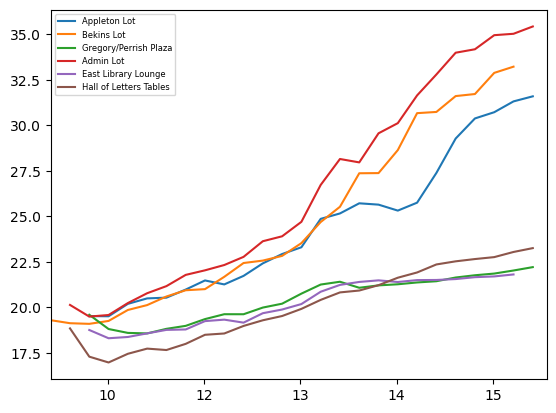

In [234]:
# graph 2: show the differences in temperature readings at different hours in a day
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# list of CSV files
bekinslot_files = ['bekins6_13.csv']#['bekinslot6_1.csv','bekinslot6_5.csv', 'bekinslot6_6.csv', 'bekinslot6_7.csv', 'bekins6_9.csv', 'bekins6_12.csv', 'bekins6_13.csv', 'bekins6_14.csv', 'bekins6_15.csv']
eastlibtables_files = ['eastlibtables6_13.csv']#['eastlibtables6_7.csv', 'eastlibtables6_8.csv', 'eastlibtables6_9.csv', 'eastlibtables6_12.csv', 'eastlibtables6_13.csv', 'eastlibtables6_14.csv', 'eastlibtables6_15.csv']
HOLtables_files = ['holtables6_13.csv']#['holtables6_1.csv', 'holtables6_8.csv', 'HOLtables6_9.csv', 'holtables6_12.csv', 'holtables6_13.csv', 'holtables6_14.csv', 'holtables6_15.csv']
adminlot_files = ['admin6_13.csv']#['admin6_5.csv','admin6_6.csv', 'admin6_8.csv', 'admin6_9.csv', 'admin6_12.csv', 'admin6_13.csv', 'admin6_14.csv', 'admin6_20-22.csv'] 
appleton_files = ['Appleton6_13.csv']#['Appleton6_2.csv', 'Appleton6_5.csv', 'Appleton6_6.csv', 'appleton6_9.csv', 'Appletonlot6_12.csv', 'Appleton6_13.csv', 'Appleton6_14.csv', 'appletonlot6_15.csv']
gregory_files = ['gregory6_13.csv']#['gregoryplaza6_2.csv', 'gregoryplaza6_8.csv', 'gregory6_9.csv', 'gregory6_12.csv', 'gregory6_13.csv', 'gregory6_14.csv']
alldata = [
           appleton_files,
           bekinslot_files,
           gregory_files, #type [-1] right after list name to only use the last file in the list
           adminlot_files,
           eastlibtables_files,
           HOLtables_files,
           ]
labels = [
    "Appleton Lot", 
          "Bekins Lot", 
          "Gregory/Perrish Plaza", 
          "Admin Lot", 
          "East Library Lounge", 
          "Hall of Letters Tables"]

# create figure and axis
fig, ax = plt.subplots()

# empty list
#y_interp_list = []
y_list = []
x_list = []
df = pd.DataFrame()
# loop through CSV files
N_obs = 0
x_interp = None
for csv_files in alldata:
    # read data from CSV file into DataFrame, parsing dates and times
    df = pd.DataFrame() # resets data to an empty frame as a placeholder
    for csv_file in csv_files: # read each dataframe within each list and concatenate
                   dfr = pd.read_csv(csv_file, parse_dates=['Date-Time (PDT)'])
                   df  = pd.concat([df, dfr], axis = 0)      
    #df = pd.concat([df, df1], axis = 0) # concatenates the cumulative data
    # extract x and y values from DataFrame
    x = df['Date-Time (PDT)'].values
    y = df['Ch: 1 - Temperature   (°C)'].values
    hasdata = (~np.isnan(x))*(~np.isnan(y))
    x = x[hasdata]
    y = y[hasdata]
    
    # convert dates to numerical values (timestamps)
    x = mdates.date2num(x)
    if x_interp is None:
        x_interp = x

    # perform linear interpolation
    #y_interp = interp1d(x, y,fill_value=np.NaN)

    #append x and y values to list
    x_list.append(x)
#    print(x.shape,x_list[-1].shape)
#    yi = y_interp(x_interp)
    y_list.append(y.tolist())
    #data_frames.append(df)
#
# calculate mean of interpolated y values for each x value
#y_mean = np.mean(y_interp_list, axis=0)
xmin = np.inf
xmax = -np.inf
for x in x_list:
    xmin = np.min([xmin,np.nanmin(x)])
    xmax = np.max([xmax,np.nanmax(x)])
    print(xmin,xmax)
x_interp =  np.arange(xmin,xmax+.01,.01)

#print(x_interp)
# plot mean of interpolated y values
#ax.plot(x_list, (y_interp_list-y_mean), label='Mean')
yi_list = []
Nobs = 0*x_interp
ymean = 0*x_interp
for i,x in enumerate(x_list):
    label = labels[i]
    delta = np.min(np.abs(x[:,np.newaxis]-x_interp),axis=0)
    mask = delta*0+1
    mask[delta>.1]=np.nan
  #  print(np.array(x_list[i])-x)
    #ax.plot(x_list[i], y_list[i], ".", label=label)
    y_interp = interp1d(x, y_list[i],fill_value=np.NaN,bounds_error=False)
    yi = y_interp(x_interp)*mask
    #ax.plot(x_interp-np.floor(x_interp), yi, ".", label=label+" interp")
    ymean[~np.isnan(yi)] = yi[~np.isnan(yi)]+ymean[~np.isnan(yi)]
    yi_list.append(yi*mask)
    Nobs[~np.isnan(yi)] = Nobs[~np.isnan(yi)]+1
ymean[Nobs>0] = ymean[Nobs>0]/Nobs[Nobs>0]
ymean[Nobs==0] = np.nan 
for i, yi in enumerate(yi_list):
    label = labels[i]
#    ax.plot(x_interp, yi-ymean, label=label)
    ax.plot(x_interp, yi, label=label)
#ax.scatter(x_interp, ymean, label="mean")
ax.set_xlim(xmin,xmax)
# format x-axis as dates
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
#print(yi_list)
# add legend and show plot

ax.legend(fontsize = '6')
plt.show()

In [39]:
df.columns

Index(['#', 'Date-Time (PDT)', 'Ch: 1 - Temperature   (°C)', 'Button Up',
       'Button Down', 'Host Connected', 'Stopped', 'End of File'],
      dtype='object')

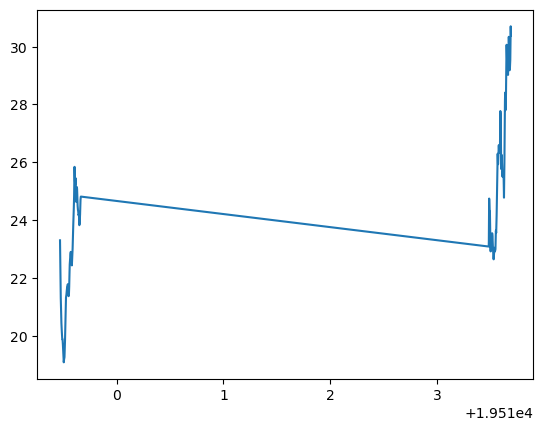

In [27]:
y_list[1]
plt.plot(x_interp,yi_list[1])

In [22]:
x_interp

array([19509.46875, 19509.46975, 19509.47075, ..., 19513.69375,
       19513.69475, 19513.69575])

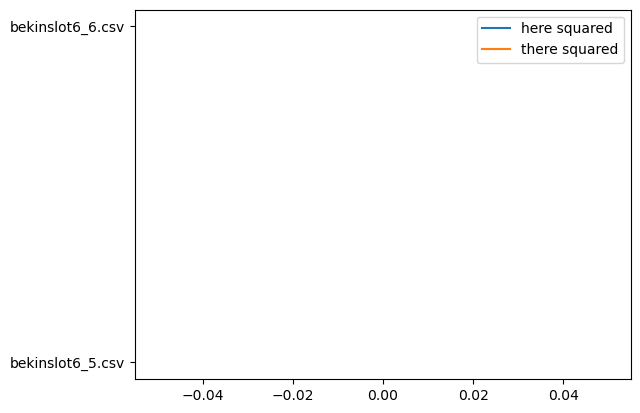

In [95]:
#test.keys()
#for k,v in test.items():
 #   dfr = pd.read_csv(csv_file, parse_dates=['Date-Time (PDT)'])
   # plt.plot(np.array(v),label=k+" squared")
#plt.legend()

In [63]:
# graph 3: show a few temp. datasets for a day and display them alongside weatherstation data

In [66]:
x_list[1]

array([19523.44543981, 19523.44545139, 19523.44892361, 19523.45239583,
       19523.45586806, 19523.45934028, 19523.4628125 , 19523.46628472,
       19523.46975694, 19523.47322917, 19523.47670139, 19523.48017361,
       19523.48364583, 19523.48711806, 19523.49059028, 19523.4940625 ,
       19523.49753472, 19523.50100694, 19523.50447917, 19523.50795139,
       19523.51142361, 19523.51489583, 19523.51836806, 19523.52184028,
       19523.5253125 , 19523.52878472, 19523.53225694, 19523.53572917,
       19523.53920139, 19523.54267361, 19523.54614583, 19523.54961806,
       19523.55309028, 19523.5565625 , 19523.56003472, 19523.56350694,
       19523.56697917, 19523.57045139, 19523.57392361, 19523.57739583,
       19523.58086806, 19523.58434028, 19523.5878125 , 19523.59128472,
       19523.59475694, 19523.59822917, 19523.60170139, 19523.60517361,
       19523.60864583, 19523.61211806, 19523.61559028, 19523.6190625 ,
       19523.62253472, 19523.62600694, 19523.62947917, 19523.63295139,
      

In [76]:
a_list = []
print(a_list)
a_list.append([1,2,3])
print(a_list)
a_list.append([1,2,3])
print(a_list)

[]
[[1, 2, 3]]
[[1, 2, 3], [1, 2, 3]]


In [87]:
nparray = np.array([1,2,3])
A = []
for i in range (4):
 A.append(nparray.tolist())
 print(A)

[[1, 2, 3]]
[[1, 2, 3], [1, 2, 3]]
[[1, 2, 3], [1, 2, 3], [1, 2, 3]]
[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]
